In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv(f'/content/Health_Sleep_Statistics.csv')
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,6:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,0:30,7:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,6:45,9000,2700,high,healthy,no,no
3,4,41,m,5,1:00,6:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,7:00,10000,2800,high,medium,no,no


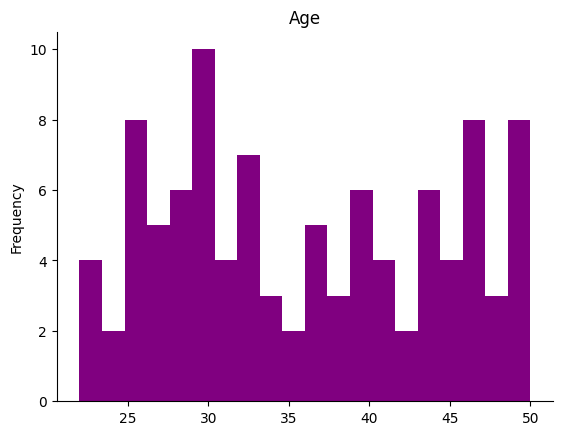

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age', color= "purple")
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.size

1200

In [ ]:
df.columns.size

12

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [ ]:
df.isna().sum()

,0
User ID,0
Age,0
Gender,0
Sleep Quality,0
Bedtime,0
Wake-up Time,0
Daily Steps,0
Calories Burned,0
Physical Activity Level,0
Dietary Habits,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(['User ID'],axis=1, inplace= True)

In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,6:30,8000,2500,medium,healthy,no,no
1,34,m,7,0:30,7:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,6:45,9000,2700,high,healthy,no,no
3,41,m,5,1:00,6:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,7:00,10000,2800,high,medium,no,no


**Age vs Sleep Qulity Analysis**

In [ ]:
age_sleep_quality_corr=df[['Age','Sleep Quality']].corr()

In [ ]:
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [ ]:
age_sleep_quality_corr['Age']

,Age
Age,1.000000
Sleep Quality,-0.848356


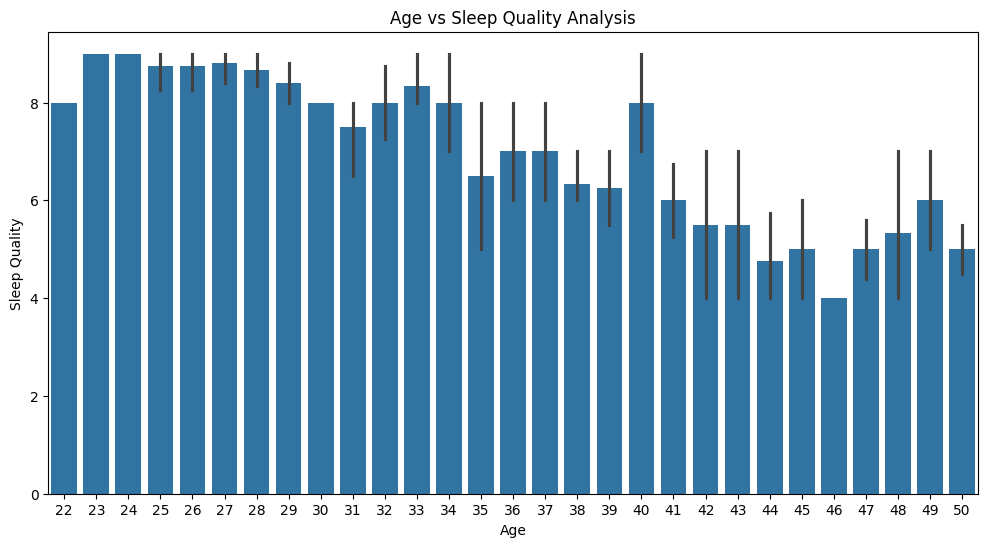

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age',y="Sleep Quality", data=df)
plt.title("Age vs Sleep Quality Analysis")
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model= LinearRegression()

x= df[['Age']]
y=df['Sleep Quality']

age_sleep_quality_model.fit(x,y)

LinearRegression()

In [ ]:
age_sleep_quality_model.intercept_

13.268812023190648

In [ ]:
age_sleep_quality_model.coef_

array([-0.17408531])

In [ ]:
age_sleep_quality_prediction = age_sleep_quality_model.predict(x)

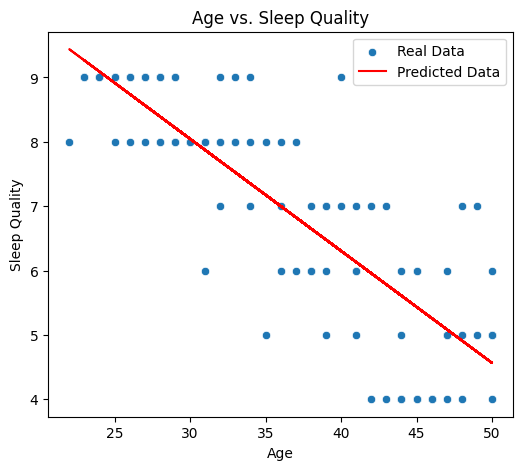

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x = 'Age', y = 'Sleep Quality', data = df, label = 'Real Data')
plt.title("Age vs. Sleep Quality")
plt.plot(x,age_sleep_quality_prediction, color="red" ,label = 'Predicted Data')
plt.legend()
plt.show()

**Physical activity vs Sleep Qulity**

In [ ]:
df["Physical Activity Level"].head()

,Physical Activity Level
0,medium
1,low
2,high
3,low
4,high


In [ ]:
df['Sleep Quality'].head()

,Sleep Quality
0,8
1,7
2,9
3,5
4,8


In [ ]:
df['Gender'].head()

,Gender
0,f
1,m
2,f
3,m
4,f


Text(0.5, 1.0, 'Gender vs Sleep Quality')

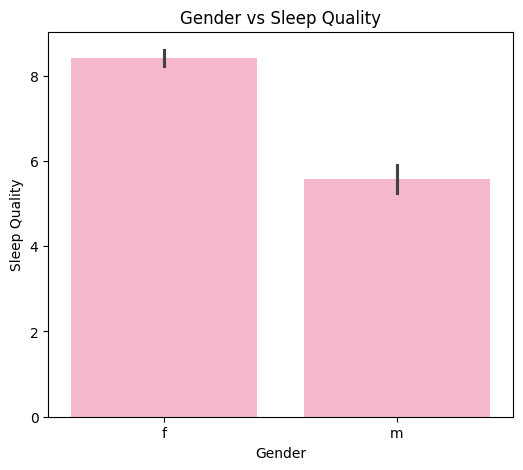

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x="Gender", y="Sleep Quality", data = df, color='#FFAEC9')
plt.title('Gender vs Sleep Quality')

Text(0.5, 1.0, 'Physical Activity Level vs Sleep Quality')

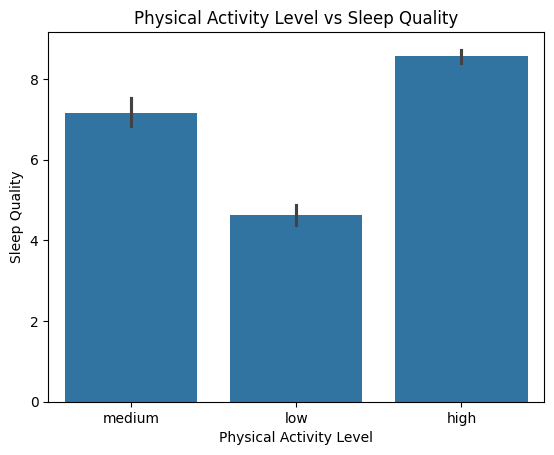

In [ ]:
sns.barplot(x="Physical Activity Level", y="Sleep Quality", data = df)
plt.title('Physical Activity Level vs Sleep Quality')

In [ ]:
custom_code= {'low':1, 'medium':2, 'high':3}
df['Physical Activity Level'] = df['Physical Activity Level'].map(custom_code)
df['Physical Activity Level'].head()

,Physical Activity Level
0,2
1,1
2,3
3,1
4,3


Text(0.5, 1.0, 'Gender vs Physical Acitvity Level')

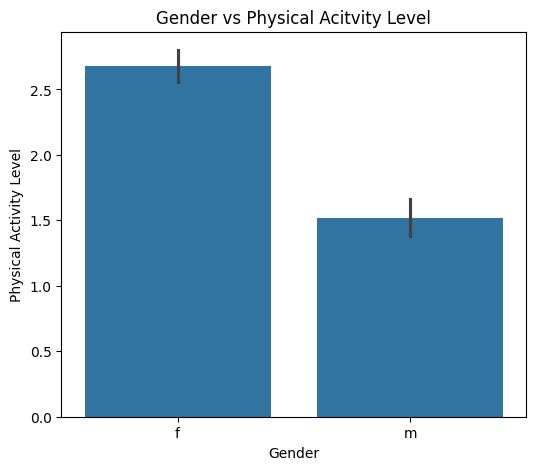

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x="Gender",y="Physical Activity Level",  data = df)
plt.title("Gender vs Physical Acitvity Level")


In [ ]:
from scipy import stats

sleep_quality_males =df[df['Gender']=="m"]["Sleep Quality"]
sleep_quality_females =df[df['Gender']=="f"]["Sleep Quality"]

Physical_activity_males =df[df['Gender']=="m"]["Physical Activity Level"]
Physical_activity_females =df[df['Gender']=="f"]["Physical Activity Level"]

**Lets find out t and p values for Sleep Quality vs Gender & Physical Activity vs Gender**

In [ ]:
t_sleep_Quality, p_sleep_Quality = stats.ttest_ind(sleep_quality_males,sleep_quality_females)

print(f't stat value for Sleep Quality vs Gender :{t_sleep_Quality:.2f}')
print(f'p stat value for Sleep Quality vs Gender :{p_sleep_Quality:.2f}')

t stat value for Sleep Quality vs Gender :-14.32
p stat value for Sleep Quality vs Gender :0.00


In [ ]:
t_Physical_Activity, p_Physical_Activity = stats.ttest_ind(Physical_activity_males,Physical_activity_females)

print(f't stat value for Physical Activity vs Gender :{t_Physical_Activity:.2f}')
print(f'p stat value for Physical Activity vs Gender :{p_Physical_Activity:.2f}')

t stat value for Physical Activity vs Gender :-10.98
p stat value for Physical Activity vs Gender :0.00


**Time of Sleep & waking up vs Sleep Quality**

In [ ]:
df["Bedtime"].head()

,Bedtime
0,23:00
1,0:30
2,22:45
3,1:00
4,23:30


In [ ]:
df["Wake-up Time"].head()

,Wake-up Time
0,6:30
1,7:00
2,6:45
3,6:30
4,7:00


In [ ]:
def sleep_time_helper(str_time):
  h= str_time.split(":")[0]
  m= str_time.split(":")[1]

  return int(h) + int(m)/60

df["Bedtime"] = df["Bedtime"].apply(sleep_time_helper)
df["Wake-up Time"] = df["Wake-up Time"].apply(sleep_time_helper)

In [ ]:
df['Bedtime'].head()

,Bedtime
0,23.00
1,0.50
2,22.75
3,1.00
4,23.50


In [ ]:
df['Sleep_Duration_Hours']= (df["Wake-up Time"]-df["Bedtime"])%24
df["Sleep_Duration_Hours"].head()

,Sleep_Duration_Hours
0,7.5
1,6.5
2,8.0
3,5.5
4,7.5


In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep_Duration_Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


<Axes: title={'center': 'Bedtime vs Sleep Quality'}, xlabel='Bedtime', ylabel='Sleep Quality'>

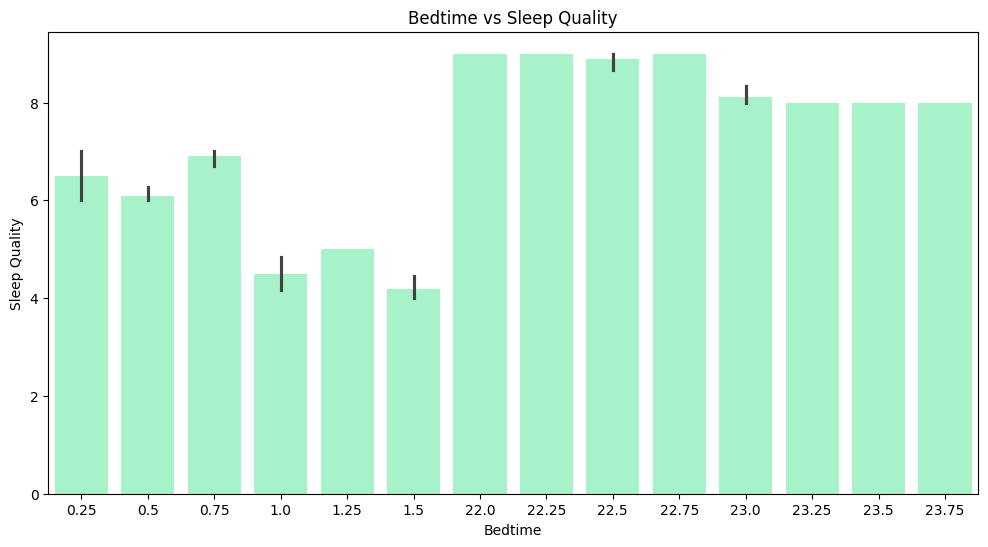

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Bedtime vs Sleep Quality")
sns.barplot(x="Bedtime", y="Sleep Quality", data=df, color='#9AFFC6')

<Axes: title={'center': 'Wake up time vs Sleep Quality'}, xlabel='Wake-up Time', ylabel='Sleep Quality'>

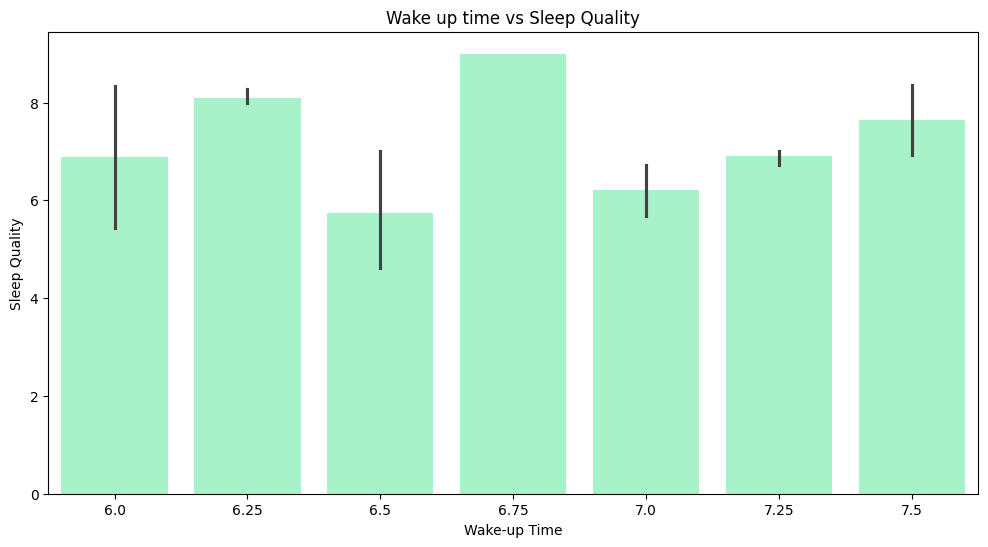

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Wake up time vs Sleep Quality")
sns.barplot(x="Wake-up Time", y="Sleep Quality", data=df, color='#9AFFC6')


<Axes: title={'center': 'Sleep_Duration_Hours vs Sleep Quality'}, xlabel='Sleep_Duration_Hours', ylabel='Sleep Quality'>

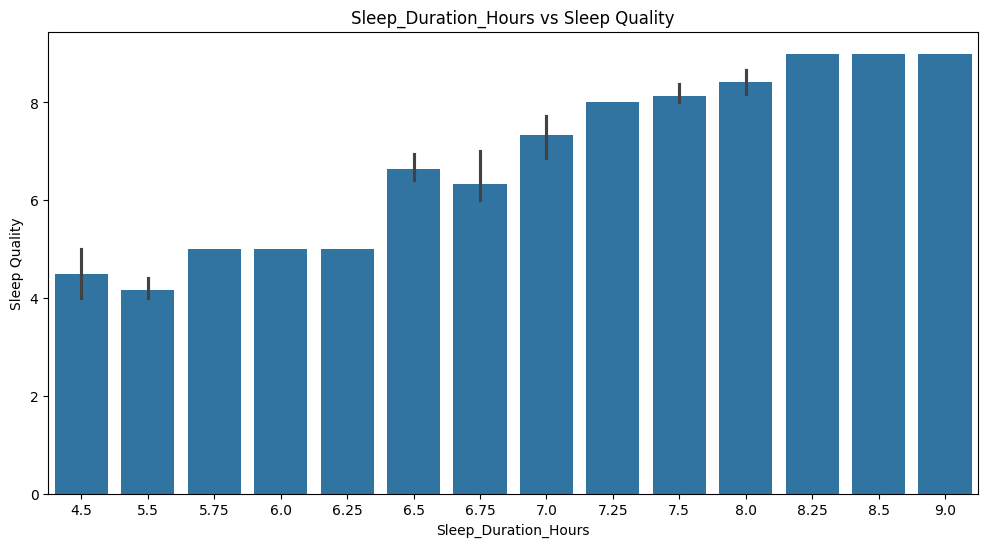

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Sleep_Duration_Hours vs Sleep Quality")
sns.barplot(x="Sleep_Duration_Hours", y="Sleep Quality", data=df)


In [ ]:
Sleep_Duration_Quality_model= LinearRegression()

x= df[['Sleep_Duration_Hours']]
y= df['Sleep Quality']

Sleep_Duration_Quality_model.fit(x,y)

LinearRegression()

In [ ]:
Sleep_Duration_Quality_model.coef_

array([1.36940999])

In [ ]:
Sleep_Duration_Quality_model.intercept_

-2.575599349763152

In [ ]:
prediction = Sleep_Duration_Quality_model.predict(x)


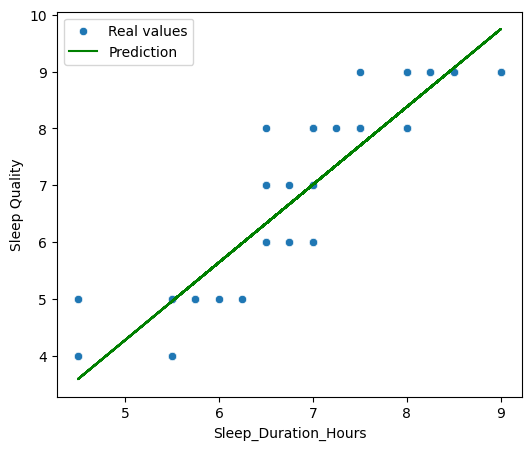

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="Sleep_Duration_Hours",y="Sleep Quality", data=df, label = 'Real values')
plt.plot(x,prediction, color="green", label="Prediction")
plt.legend()
plt.show()


In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep_Duration_Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


# **Sleep Disoder vs Sleep Quality**

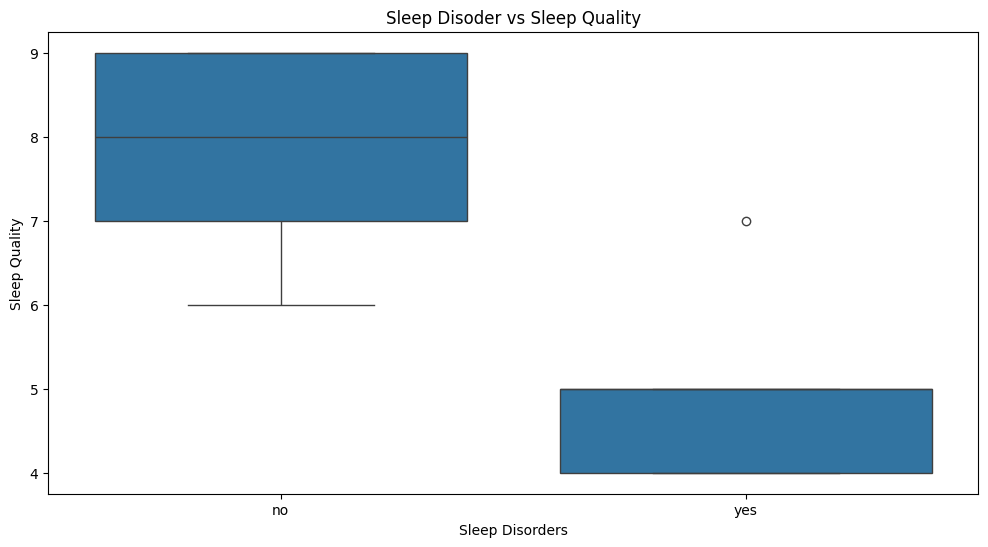

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Sleep Disorders", y="Sleep Quality" , data=df)
plt.title("Sleep Disoder vs Sleep Quality")
plt.show()

In [ ]:
df_numeric_features = df.select_dtypes(include=["int64","float64"])

In [ ]:
df_numeric_features.head()

,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Sleep_Duration_Hours
0,25,8,23.00,6.50,8000,2500,2,7.5
1,34,7,0.50,7.00,5000,2200,1,6.5
2,29,9,22.75,6.75,9000,2700,3,8.0
3,41,5,1.00,6.50,4000,2100,1,5.5
4,22,8,23.50,7.00,10000,2800,3,7.5


<Axes: >

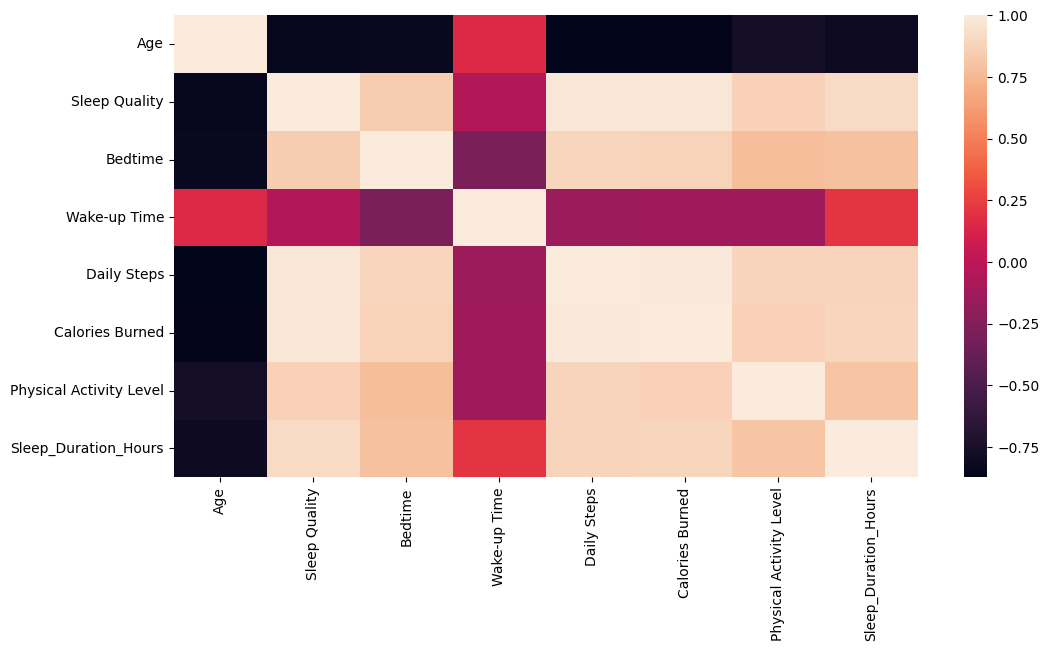

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric_features.corr())

In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep_Duration_Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


**Dietary habits vs Sleeping Quality**

In [ ]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
unhealthy,41
medium,30
healthy,29


In [ ]:
Dietary_Habiits_custom_codes = {'unhealthy': 1, 'medium': 2, 'healthy': 3}

# Apply the custom codes using map()
df['Dietary Habits'] = df['Dietary Habits'].map(Dietary_Habiits_custom_codes)
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep_Duration_Hours
0,25,f,8,23.00,6.50,8000,2500,2,3,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,1,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,3,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,1,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,2,no,no,7.5


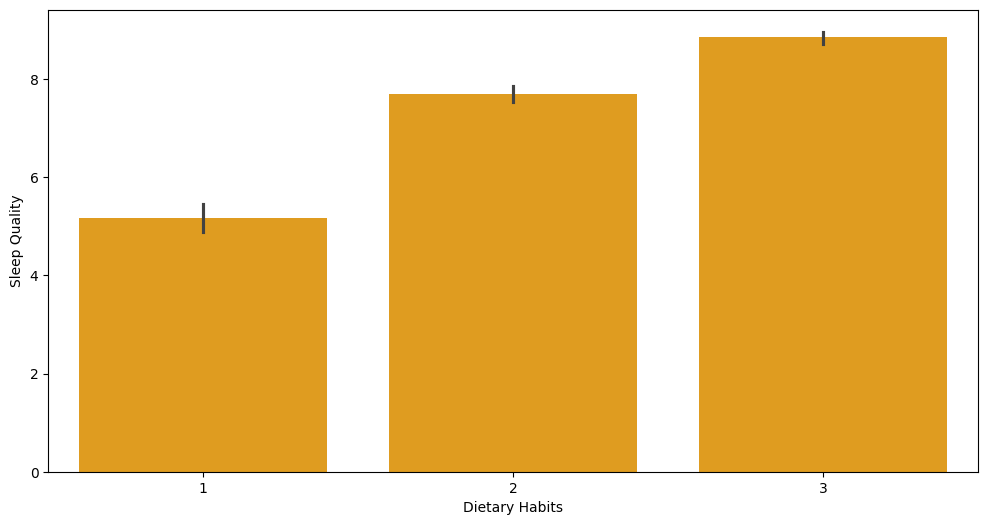

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Dietary Habits", y="Sleep Quality", data=df, color="orange")
plt.show()

**Sleep Disorder affect on Physical Activity**

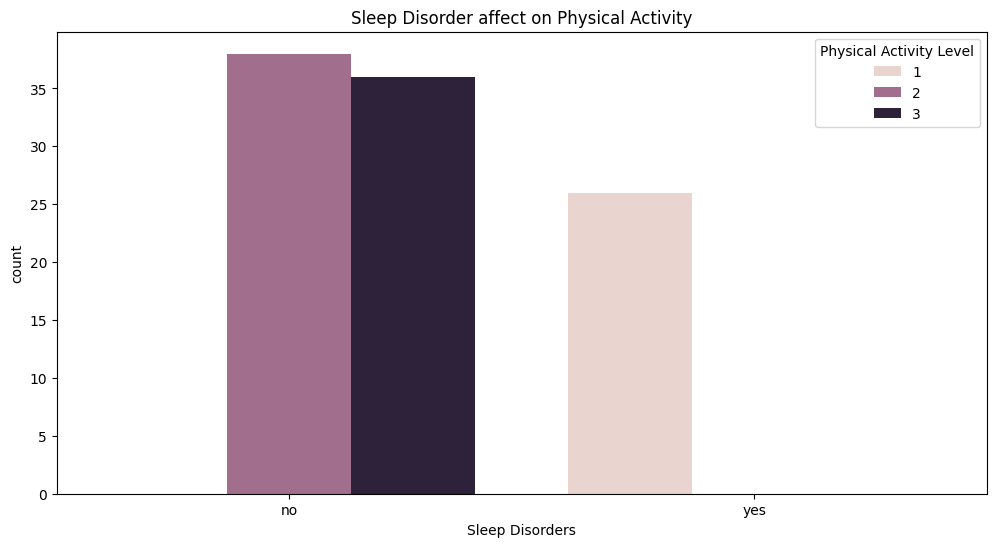

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sleep Disorders', hue="Physical Activity Level", data=df)
plt.title("Sleep Disorder affect on Physical Activity")
plt.show()

In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep_Duration_Hours
0,25,f,8,23.00,6.50,8000,2500,2,3,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,1,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,3,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,1,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,2,no,no,7.5


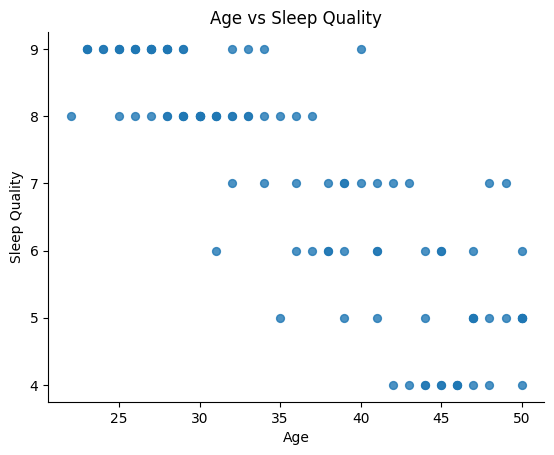

In [ ]:
# @title Age vs Sleep Quality

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Sleep Quality', s=32, alpha=.8)
plt.title("Age vs Sleep Quality")
plt.gca().spines[['top', 'right',]].set_visible(False)

**Medication vs Sleep Quality**

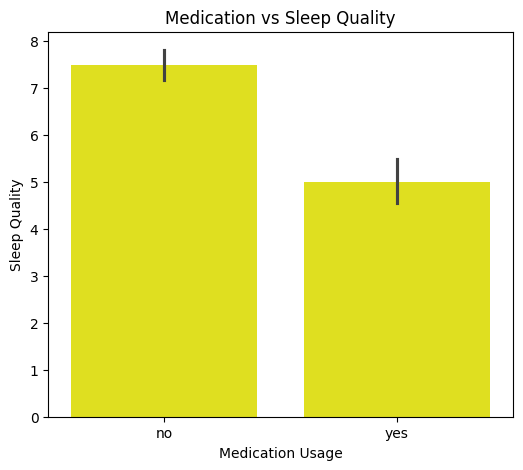

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x="Medication Usage", y="Sleep Quality", data=df, color="yellow")
plt.title("Medication vs Sleep Quality")
plt.show()

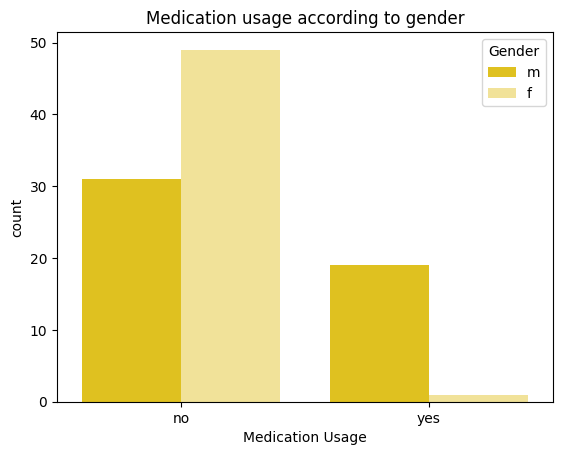

In [ ]:
yellow_palette = ['#FFD700', '#FFEC8B']
sns_plot = sns.countplot(x='Medication Usage', hue='Gender', data=df, palette=yellow_palette, hue_order=['m', 'f'] )
plt.title('Medication usage according to gender')
sns_plot.set_xticks([0,1])
sns_plot.set_xticklabels(["no","yes"])
plt.show()

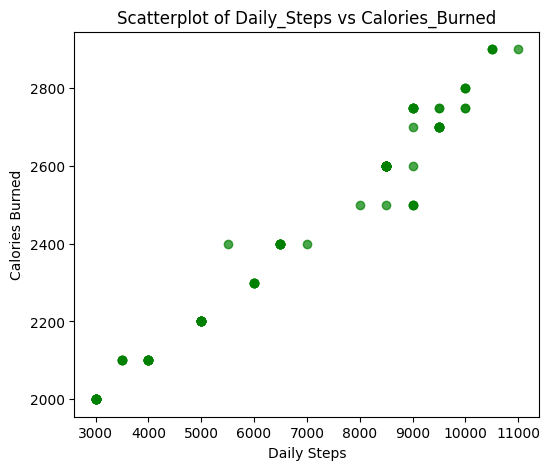

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df['Daily Steps'], df['Calories Burned'], color='green', alpha=0.7)
plt.xlabel('Daily Steps')
plt.ylabel('Calories Burned')
plt.title("Scatterplot of Daily_Steps vs Calories_Burned")
plt.show()

**Daily steps according to the Gender**

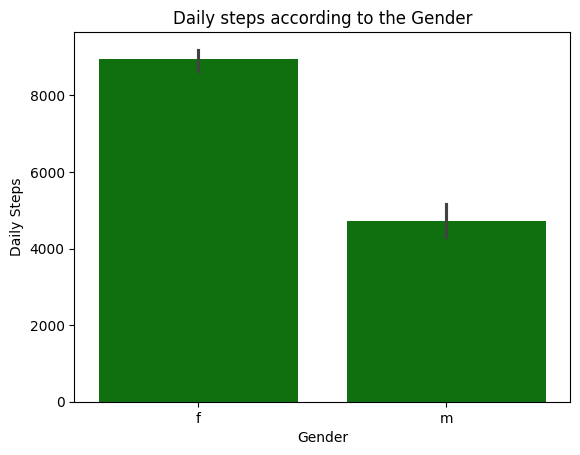

In [ ]:
plt.Figure(figsize=(12,6))
sns.barplot(x="Gender", y="Daily Steps" ,data=df ,color="green")
plt.title("Daily steps according to the Gender")
plt.show()


In [ ]:
df_numerics = df.select_dtypes(include = ['number'])
corr = df_numerics.corr()

print(corr['Sleep Quality'].sort_values(ascending=False))

Sleep Quality              1.000000
Daily Steps                0.976277
Calories Burned            0.973557
Sleep_Duration_Hours       0.918909
Dietary Habits             0.902498
Physical Activity Level    0.875203
Bedtime                    0.853312
Wake-up Time              -0.048526
Age                       -0.848356
Name: Sleep Quality, dtype: float64


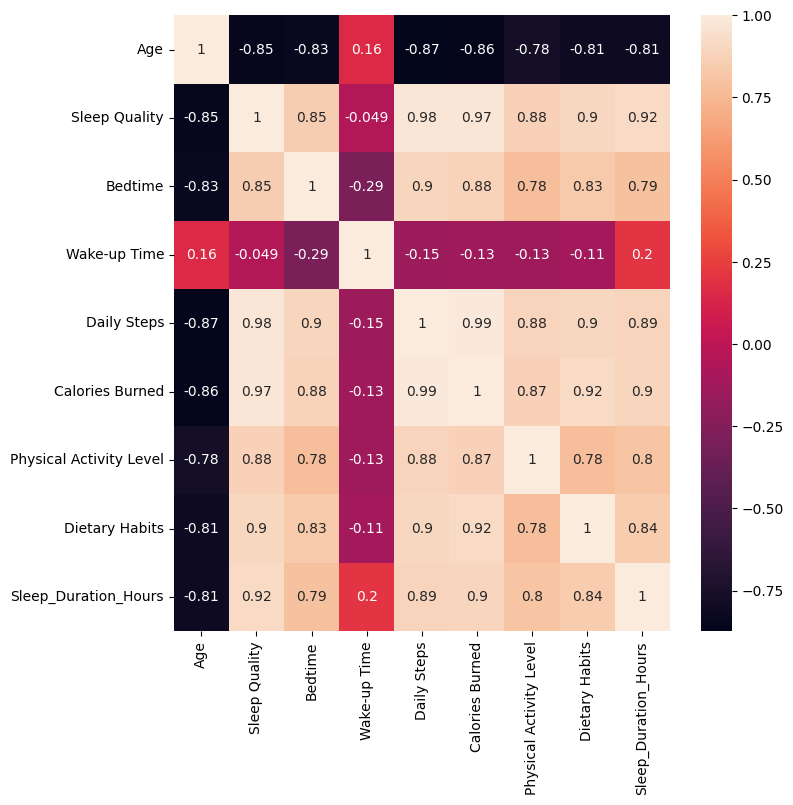

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)
plt.show()

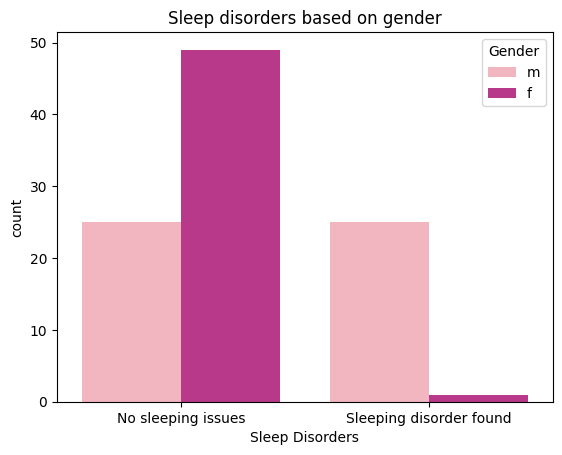

In [ ]:
sns_plot = sns.countplot(x='Sleep Disorders', hue='Gender', data=df, palette= 'RdPu',  hue_order=['m', 'f'])
plt.title('Sleep disorders based on gender')
sns_plot.set_xticks([0, 1])
sns_plot.set_xticklabels(['No sleeping issues', 'Sleeping disorder found'])
plt.show()


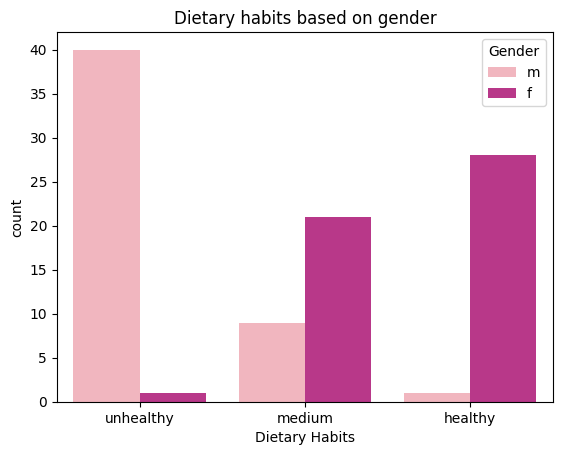

In [ ]:
sns_plot = sns.countplot(x='Dietary Habits', hue='Gender', data=df, palette= 'RdPu',  hue_order=['m', 'f'])
plt.title('Dietary habits based on gender')
sns_plot.set_xticks([0,1,2])
sns_plot.set_xticklabels(['unhealthy', 'medium', 'healthy'])
plt.show()

In [ ]:
df.describe()

,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep_Duration_Hours
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000
mean,36.010000,7.000000,11.867500,6.860000,6830.000000,2421.00000,2.10000,1.880000,6.992500
std,8.454865,1.734964,11.001863,0.449916,2498.706736,281.06759,0.78496,0.832181,1.164205
min,22.000000,4.000000,0.250000,6.000000,3000.000000,2000.00000,1.00000,1.000000,4.500000
25%,28.750000,5.750000,0.937500,6.500000,4750.000000,2175.00000,1.00000,1.000000,6.437500
50%,35.000000,7.500000,11.750000,7.000000,6750.000000,2400.00000,2.00000,2.000000,7.000000
75%,44.000000,8.250000,22.812500,7.062500,9000.000000,2700.00000,3.00000,3.000000,8.000000
max,50.000000,9.000000,23.750000,7.500000,11000.000000,2900.00000,3.00000,3.000000,9.000000


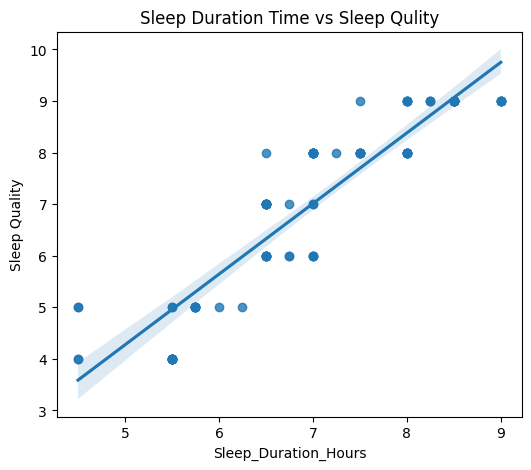

In [ ]:
plt.figure(figsize=(6,5))
sns.regplot(x="Sleep_Duration_Hours",y="Sleep Quality", data=df, label = 'Real values')
plt.title("Sleep Duration Time vs Sleep Qulity")
plt.show()

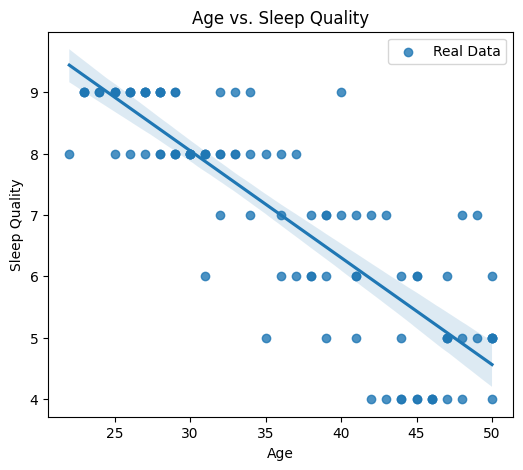

In [ ]:
plt.figure(figsize=(6,5))
sns.regplot(x = 'Age', y = 'Sleep Quality', data = df, label = 'Real Data')
plt.title("Age vs. Sleep Quality")
plt.legend()
plt.show()

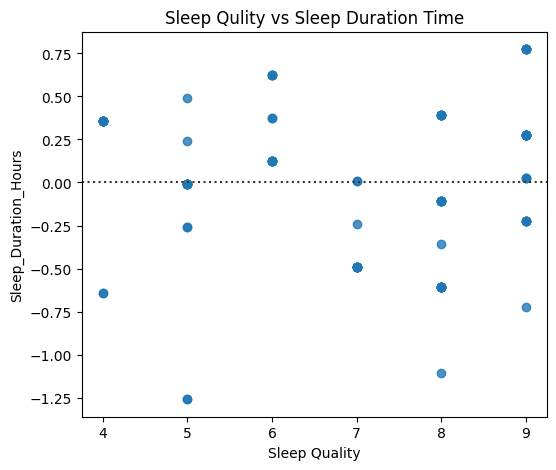

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.residplot(x=df['Sleep Quality'], y=df['Sleep_Duration_Hours'])
plt.title("Sleep Qulity vs Sleep Duration Time")
plt.show()


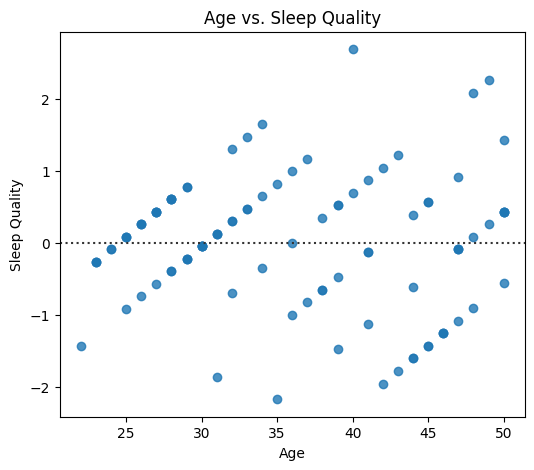

In [ ]:
plt.figure(figsize=(6,5))
sns.residplot(x =df['Age'], y = df['Sleep Quality'])
plt.title("Age vs. Sleep Quality")
plt.show()

In [ ]:
df[['Gender', 'Dietary Habits']]


,Gender,Dietary Habits
0,f,3
1,m,1
2,f,3
3,m,1
4,f,2
...,...,...
95,m,2
96,f,2
97,m,1
98,f,3


In [ ]:
df[['Gender', 'Dietary Habits']].value_counts

<bound method DataFrame.value_counts of    Gender  Dietary Habits
0       f               3
1       m               1
2       f               3
3       m               1
4       f               2
..    ...             ...
95      m               2
96      f               2
97      m               1
98      f               3
99      m               1

[100 rows x 2 columns]>

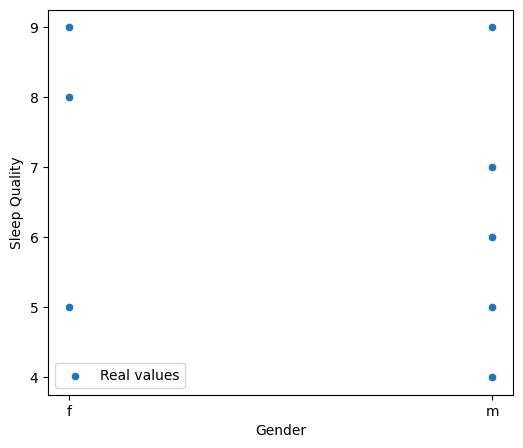

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="Gender",y="Sleep Quality", data=df, label = 'Real values')
plt.legend()
plt.show()

**Multiple linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
z= df[["Age","Daily Steps","Calories Burned","Sleep_Duration_Hours"]]

In [ ]:
lm.fit(z, df["Sleep Quality"])

LinearRegression()

In [ ]:
lm.intercept_

-2.0589499161636393

In [ ]:
lm.coef_

array([0.0101855 , 0.00040395, 0.00146917, 0.33983974])

In [ ]:
y= lm.predict(z)

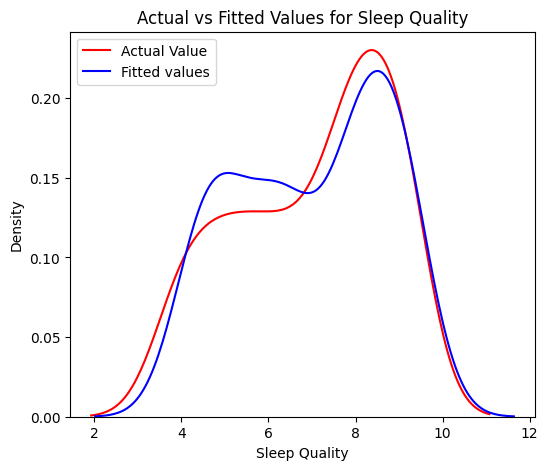

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))

sns.kdeplot(df['Sleep Quality'], color="r", label="Actual Value")
sns.kdeplot(y, color="b", label="Fitted values")

plt.title("Actual vs Fitted Values for Sleep Quality")

plt.legend()
plt.show()
plt.close()

**R^2 values and MSE**

1

In [ ]:
x=df[["Sleep_Duration_Hours"]]
y=df["Sleep Quality"]

In [ ]:
lm.fit(x,y)
print("The R -Square is: ", lm.score(x,y))

The R -Square is:  0.8443929044393099


In [ ]:
yh=lm.predict(x)
print("The output of the first four predicted value: ", y[0:4])

The output of the first four predicted value:  0    8
1    7
2    9
3    5
Name: Sleep Quality, dtype: int64


Mean_square_error

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(df['Sleep Quality'],yh)
print("The mean square error of sleep quality and predictted value is:", mse)

The mean square error of sleep quality and predictted value is: 0.4637091447708566


2


In [ ]:
x1=df[["Age"]]
y1=df["Sleep Quality"]

In [ ]:
lm.fit(x1,y1)
print("The R -Square is: ", lm.score(x1,y1))

The R -Square is:  0.7197083968631832


In [ ]:
yht=lm.predict(x1)
print("The output of the first four predicted value: ", y1[0:4])

The output of the first four predicted value:  0    8
1    7
2    9
3    5
Name: Sleep Quality, dtype: int64


In [ ]:
mse = mean_squared_error(df['Sleep Quality'],yht)
print("The mean square error of sleep quality and predictted value is:", mse)

The mean square error of sleep quality and predictted value is: 0.8352689773477142


**MULIPLE LIENEAR REGRESSION R SQURED VALUE AND MSE**

In [ ]:
z= df[["Age","Daily Steps","Calories Burned","Sleep_Duration_Hours"]]

In [ ]:
lm.fit(z, df["Sleep Quality"])
print("The R -Square is: ", lm.score(z, df["Sleep Quality"]))

The R -Square is:  0.9671260094909608


In [ ]:
y_predicted_multifit = lm.predict(z)

In [ ]:
mse_multi = mean_squared_error(df['Sleep Quality'],y_predicted_multifit)
print("The mean square error of sleep quality and predictted value using multifit is:", mse_multi)


The mean square error of sleep quality and predictted value using multifit is: 0.0979644917169366


In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep_Duration_Hours
0,25,f,8,23.00,6.50,8000,2500,2,3,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,1,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,3,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,1,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,2,no,no,7.5
